# This notebook is a Part of Section 5.2

## Import the Libraries

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Fixing the Path

In [42]:
os.chdir('D:')
os.getcwd()

'D:\\'

## Import the Dataset

In [43]:
credit=pd.read_csv('german_credit.csv')

In [44]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Customer_ID                 1000 non-null int64
checking_account_status     1000 non-null object
loan_duration_mo            1000 non-null int64
credit_history              1000 non-null object
purpose                     1000 non-null object
loan_amount                 1000 non-null int64
savings_account_balance     1000 non-null object
time_employed_yrs           1000 non-null object
payment_pcnt_income         1000 non-null int64
gender_status               1000 non-null object
other_signators             1000 non-null object
time_in_residence           1000 non-null int64
property                    1000 non-null object
age_yrs                     1000 non-null int64
other_credit_outstanding    1000 non-null object
home_ownership              1000 non-null object
number_loans                1000 non-null int64
job_category                1000 non-null object
dependents         

## Data Partitioning 

In [45]:
Y=credit['bad_credit']

In [46]:
Y.value_counts()

0    700
1    300
Name: bad_credit, dtype: int64

In [47]:
credit=pd.get_dummies(credit)

In [48]:
credit.columns

Index(['Customer_ID', 'loan_duration_mo', 'loan_amount', 'payment_pcnt_income',
       'time_in_residence', 'age_yrs', 'number_loans', 'dependents',
       'bad_credit', 'checking_account_status_0 - 200 DM',
       'checking_account_status_< 0 DM',
       'checking_account_status_> 200 DM or salary assignment',
       'checking_account_status_none', 'credit_history_all loans at bank paid',
       'credit_history_critical account - other non-bank loans',
       'credit_history_current loans paid', 'credit_history_no credit - paid',
       'credit_history_past payment delays', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_other',
       'purpose_radio/television', 'purpose_repairs', 'purpose_retraining',
       'savings_account_balance_100 - 500 DM',
       'savings_account_balance_500 - 1000 DM',
       'savings_account_balance_< 100 DM',
       'savings_acco

In [49]:
X=credit[['loan_duration_mo', 'loan_amount', 'payment_pcnt_income',
       'time_in_residence', 'age_yrs', 'number_loans', 'dependents',
       'checking_account_status_0 - 200 DM',
       'checking_account_status_< 0 DM',
       'checking_account_status_> 200 DM or salary assignment',
       'checking_account_status_none', 'credit_history_all loans at bank paid',
       'credit_history_critical account - other non-bank loans',
       'credit_history_current loans paid', 'credit_history_no credit - paid',
       'credit_history_past payment delays', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_other',
       'purpose_radio/television', 'purpose_repairs', 'purpose_retraining',
       'savings_account_balance_100 - 500 DM',
       'savings_account_balance_500 - 1000 DM',
       'savings_account_balance_< 100 DM',
       'savings_account_balance_>= 1000 DM',
       'savings_account_balance_unknown/none', 'time_employed_yrs_1 - 4 years',
       'time_employed_yrs_4 - 7 years', 'time_employed_yrs_< 1 year',
       'time_employed_yrs_>= 7 years', 'time_employed_yrs_unemployed',
       'gender_status_female-divorced/separated/married',
       'gender_status_male-divorced/separated',
       'gender_status_male-married/widowed', 'gender_status_male-single',
       'other_signators_co-applicant', 'other_signators_guarantor',
       'other_signators_none',
       'property_building society savings/life insurance',
       'property_car or other', 'property_real estate',
       'property_unknown-none', 'other_credit_outstanding_bank',
       'other_credit_outstanding_none', 'other_credit_outstanding_stores',
       'home_ownership_for free', 'home_ownership_own', 'home_ownership_rent',
       'job_category_highly skilled', 'job_category_skilled',
       'job_category_unemployed-unskilled-non-resident',
       'job_category_unskilled-resident', 'telephone_none', 'telephone_yes',
       'foreign_worker_no', 'foreign_worker_yes']]

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

## Preprocssing

In [51]:
scaler=MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

## Train the model

In [52]:
logreg=LogisticRegression()
mod1=logreg.fit(X_train,Y_train)

## Test the model

In [53]:
pred1=logreg.predict(X_test)
accuracy_score(y_true=Y_test, y_pred=pred1)

0.77

## Plot the Weights for each feature

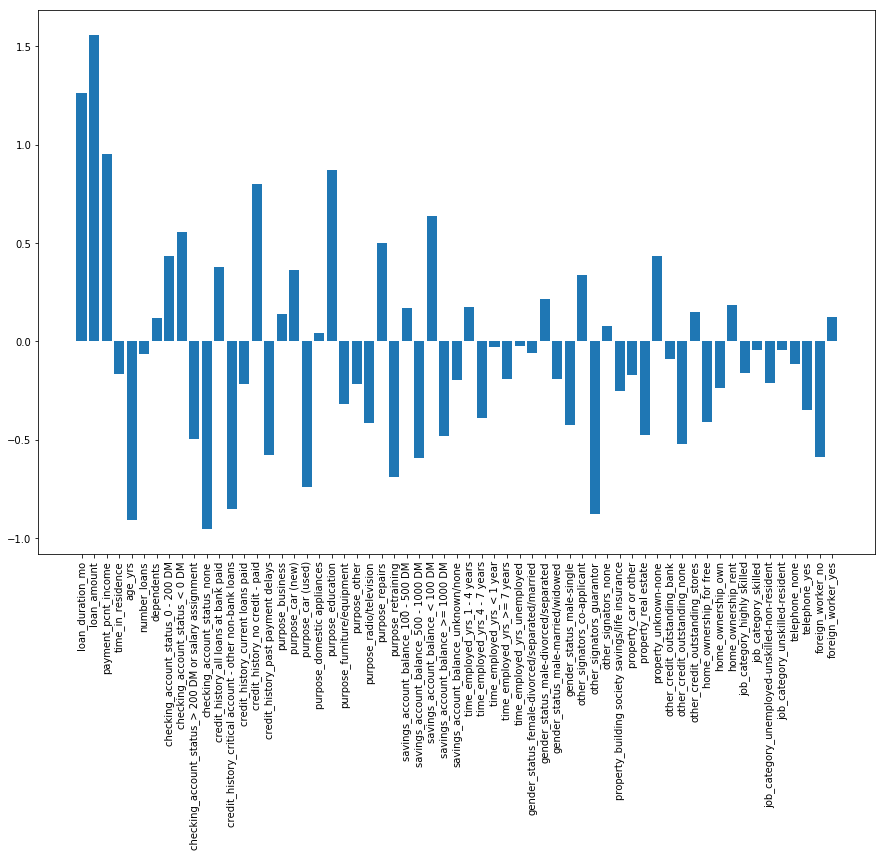

In [33]:
plt.figure(figsize=(15,10))
plt.bar(X_train.columns.tolist(),logreg.coef_[0])
plt.xticks(rotation=90,size=10)
plt.show()

## L1 Regulaiztion

In [34]:
logreg1=LogisticRegression(penalty='l1',C=1)
mod2=logreg1.fit(X_train,Y_train)
pred2=logreg1.predict(X_test)
accuracy_score(y_true=Y_test, y_pred=pred2)

0.7566666666666667

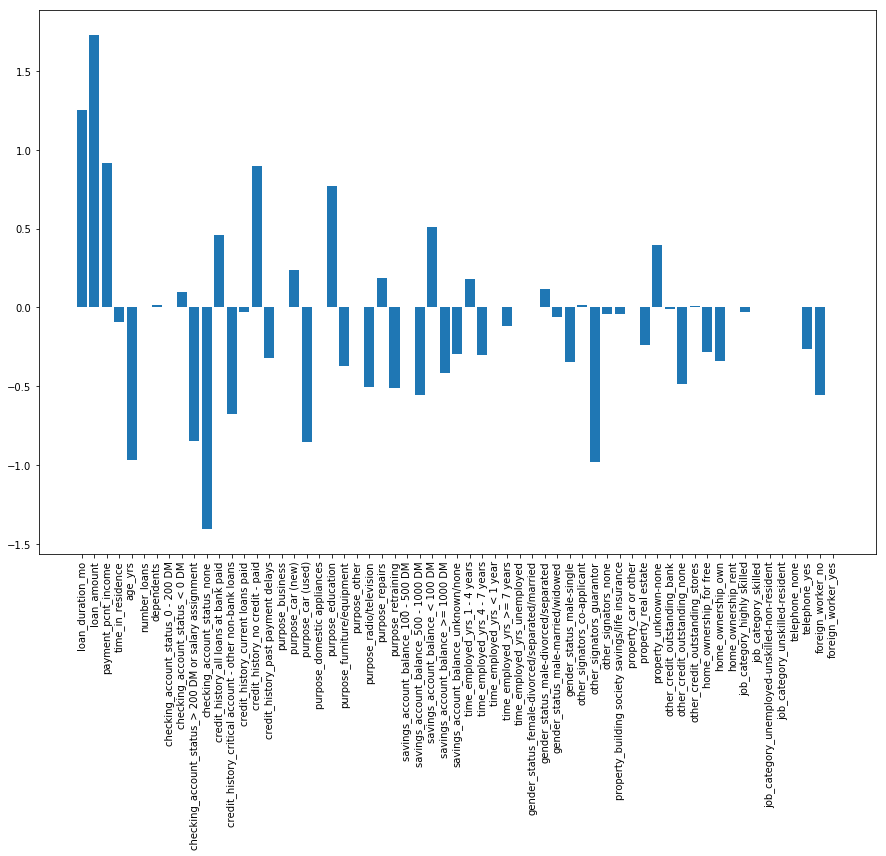

In [35]:
plt.figure(figsize=(15,10))
plt.bar(X_train.columns.tolist(),logreg1.coef_[0])
plt.xticks(rotation=90,size=10)
plt.show()

## L2 Regularization

In [37]:
logreg2=LogisticRegression(penalty='l2',C=0.01)
mod3=logreg2.fit(X_train,Y_train)
pred3=logreg2.predict(X_test)
accuracy_score(y_true=Y_test, y_pred=pred3)

0.7

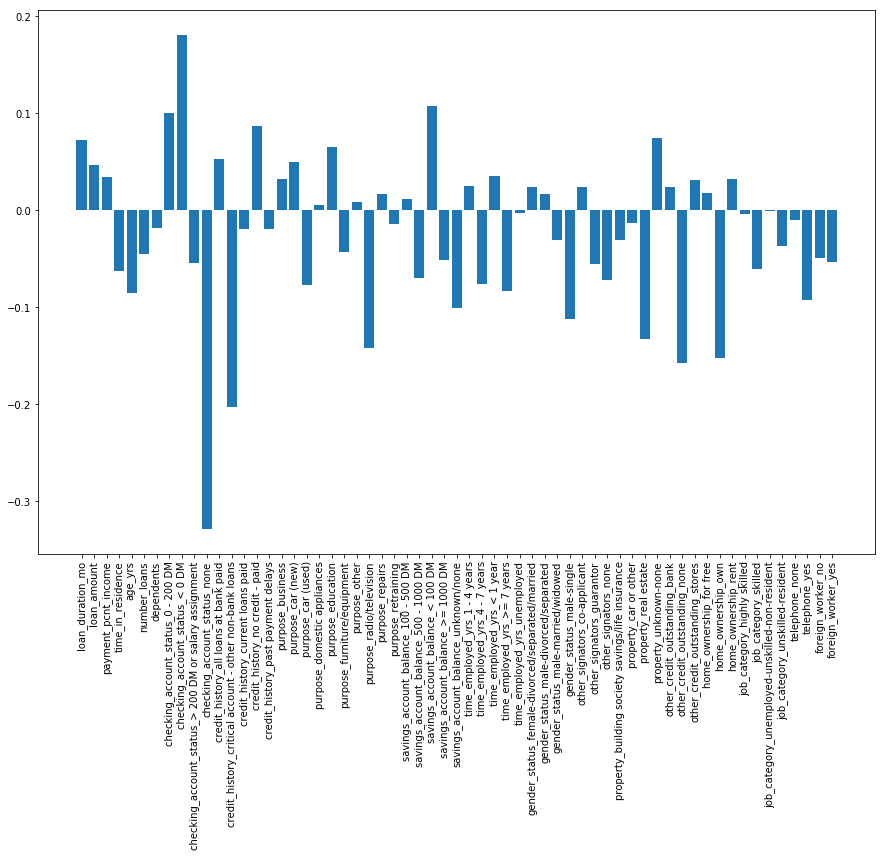

In [38]:
plt.figure(figsize=(15,10))
plt.bar(X_train.columns.tolist(),logreg2.coef_[0])
plt.xticks(rotation=90,size=10)
plt.show()